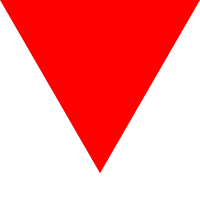

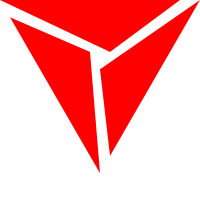

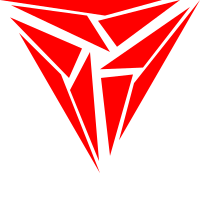

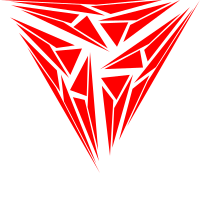

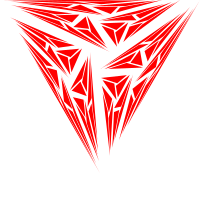

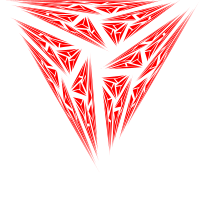

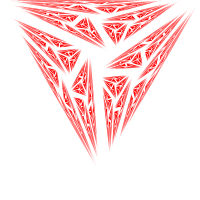

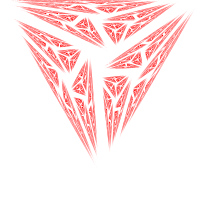

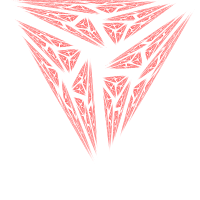

In [ ]:
from math import sqrt
import drawsvg as draw

def coord_btw(x1, x2, k):
    return x1 + k*(x2 - x1)

def point_btw(p1, p2, k):
    x1, y1 = p1
    x2, y2 = p2
    x = coord_btw(x1, x2, k)
    y = coord_btw(y1, y2, k)
    p = (x, y)
    return p

def centroid(tri):
    p1, p2, p3 = tri
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    return (sum([x1, x2, x3])/3, sum([y1, y2, y3])/3)

def smaller_tri(tri, k):
    '''Return a triangle scaled between
    the given triangle `tri` and its centroid.
    k=0 returns three concurrent points at the centroid;
    k=1 returns the given triangle.'''
    c = centroid(tri)
    q1, q2, q3 = tuple(point_btw(p, c, k) for p in tri)
    return (q1, q2, q3)

def next_iter(tri, k, m):
    '''
    Return the next iteration of the system.
    
    Parameters:
    
    - tri = (p1, p2, p3) = ((x1, y1), (x2, y2), (x3, y3)) is a triangle
    - k (0 < k < 1) scales the inner triangle
    - m (0 < m < 1) scales the edge
    
    Output: a list of three triangles'''
    
    p1, p2, p3 = tri
    
    # find the inner triangle
    s1, s2, s3 = smaller_tri(tri, k)
    
    # find the points on each edge
    e1 = point_btw(p1, p2, k)
    e2 = point_btw(p2, p3, k)
    e3 = point_btw(p3, p1, k)
    
    # return a list of new triangles
    return [
        (p1, e1, s2),
        (p2, e2, s3),
        (p3, e3, s1)
    ]

def flatten(l):
    return [item for sublist in l for item in sublist]

def draw_tri(tri, d):
    '''d is a drawsvg Drawing object'''
    (x1, y1), (x2, y2), (x3, y3) = tri
    lines = draw.Lines(x1, y1, x2, y2, x3, y3, close=True, fill='red')
    d.append(lines)

def tri_iter_drawing(w, h, t, k, m, n):
    '''
    w: image width
    h: image height
    t: initial triangle (expressed as point coordinates)
    k: zoom scaling
    m: edge scaling
    n: number of iterations
    '''
    tris = [t]
    for i in range(n):
        tris = flatten([next_iter(tri, k, m) for tri in tris])
    d = draw.Drawing(w, h, origin=(0, 0))
    for tri in tris:
        draw_tri(tri, d)
    d.rasterize() # Display as PNG
    return d

def tri_iter_drawing_demo():
    w = 200 # image width
    h = 200 # image height
    ks = [0.9, 0.95]
    ms = [0.9, 0.95]
    for k in ks:
        for m in ms:
            for n in range(10):
                t = [(0, 0), (w, 0), (w/2, sqrt(3)/2*w)]
                d = tri_iter_drawing(w, h, t, k, m, n)
                display(d)

tri_iter_drawing_demo()